# Introduction to optimisation

Optimisation is the *art* of minimising or maximimising objective functions. In this short introduction we will discuss two kinds of optimisation; *derivative-free* and *gradient-based*.

## Derivative-free optimisation
In a derivative-free optimisation the user only supplies the cost function to be minimised. For the following examples we will attempt to minimise the Rossenbrock function. This is a classical test function for optimisation algorithms. It has a steep valley, and a slow gradient at the valley bottom towards a global minimum (making it hard to minimise). The function is 
$$
f(x,y) = (a-x)^2+b(x-y^2)^2,
$$
which has a minimum at $x=y=a$. Usually $a=1$ and $b=100$.

In [35]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import ticker

In [36]:
def Rossenbrock(x, a=1, b=100):
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2

In [37]:
xx = np.linspace(-2, 2, 100)
yy =  np.linspace(-3, 3, 100)
Rossenbrock_array = np.array([[Rossenbrock([x, y]) for x in xx] for y in yy])

Text(0, 0.5, '$y$')

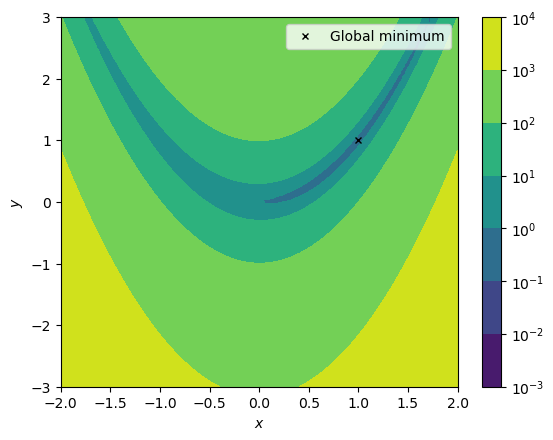

In [50]:
plt.contourf(xx, yy, Rossenbrock_array, levels=50, locator=ticker.LogLocator())
plt.colorbar()
plt.plot(1, 1, 'x', color='black', label=r'Global minimum', markersize=5)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Nelder-Mead algorithm

The Nelder-Mead algorithm finds a minimum for a function $f(\mathbf{x})$, $\mathbf{x}\in\mathbb{R}^N$, as follows.
1. Choose $N+1$ test points $\{\mathbf{x}_i\}_{i=0}^{N}$. For the Rossenbrock function $N=2$ and we can think of the test points as forming a triangle. In higher dimensions the points form a simplex.
2. Order the points such that $f(\mathbf{x}_0)<f(\mathbf{x}_1)<...<f(\mathbf{x}_N)$.
3. Calculate the centroid $\mathbf{x}_o$ of $\{\mathbf{x}_i\}_{i=0}^{N-1}$.
4. Calculate the reflection of the worst point $\mathbf{x}_N$ about the centroid $\mathbf{x}_o$, $\mathbf{x}_r=\mathbf{x}_o + \alpha(\mathbf{x}_o-\mathbf{x}_N)$ ($\alpha>0$).
5. **The reflected point is quite good**. If the reflected point is between the best point and the second worst point, $f(\mathbf{x}_0)<f(\mathbf{x}_r)<f(\mathbf{x}_{N-1})$, replace $\mathbf{x}_N$ with $\mathbf{x}_r$ and go to step 2.
6. **The reflected point is very good**. If $f(\mathbf{x}_r)<f(\mathbf{x}_0)$ the reflected point is the new best point. Expand the reflected point about the centroid to compute $\mathbf{x}_e=\mathbf{x}_o+\gamma(\mathbf{x}_r-\mathbf{x}_o)$ ($\gamma>1$). Then if $\mathbf{x}_e$ is better than the reflected point $f(\mathbf{x}_e)<f(\mathbf{x}_r)$, replace $\mathbf{x}_N$ with $\mathbf{x}_e$ and go to step 2. Otherwise replace $\mathbf{x}_N$ with $\mathbf{x}_r$ and go to step 2.
7. **The reflected point is not good**. If $f(\mathbf{x}_r)<f(\mathbf{x}_N)$ the reflected point is between the second worst and worst points so far. Compute the contraction $\mathbf{x}_c=\mathbf{x}_o+\rho (\mathbf{x}_r-\mathbf{x}_o)$, ($0<\rho<0.5$). If the contraction is better than the worst point $f(\mathbf{x}_c)<f(\mathbf{x}_N)$ replace $\mathbf{x}_N$ with $\mathbf{x}_e$ and go to step 2, otherwise go to step 9.
8. **The reflected point is the worst**. Compute the contraction $\mathbf{x}_c=\mathbf{x}_o+\rho (\mathbf{x}_N-\mathbf{x}_o)$, ($0<\rho<0.5$). If the contraction is better than the worst point $f(\mathbf{x}_c)<f(\mathbf{x}_N)$ replace $\mathbf{x}_N$ with $\mathbf{x}_e$ and go to step 2, otherwise go to step 9.
9. **The simplex is too big**. Shrink all points except the best via $\mathbf{x}_i=\mathbf{x}_0+\sigma(\mathbf{x}_i-\mathbf{x}_1)$ and go to step 2.

In [5]:
fun_NM = []
callback = lambda intermediate_result: fun_NM.append(intermediate_result['fun'])
sol_NM = scipy.optimize.minimize(Rossenbrock, x0=(-1, -1), method='Nelder-Mead', callback=callback, options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 67
         Function evaluations: 125
CPU times: user 181 ms, sys: 113 ms, total: 294 ms
Wall time: 572 ms


Text(0, 0.5, 'Cost')

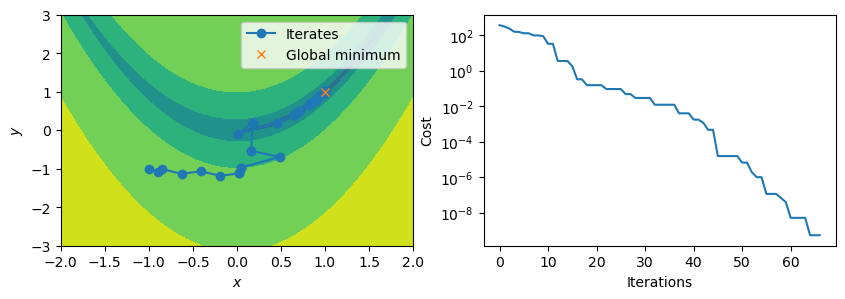

In [53]:
allvecs = np.array(sol_NM.allvecs)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].contourf(xx, yy, Rossenbrock_array,locator=ticker.LogLocator())
ax[0].plot(allvecs[:,0], allvecs[:,1],'-o', label=r'Iterates')
ax[0].plot(1, 1,'x', label=r'Global minimum')
ax[0].legend()
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[1].semilogy(fun_NM)
ax[1].set_xlabel(r'Iterations')
ax[1].set_ylabel(r'Cost')

## Gradient-based optimisation

In [12]:
def Rossenbrock_grad(x, a=1, b=100):
    return [-2*(a - x[0]) - 4*b*(x[1] - x[0]**2)*x[0], 2*b*(x[1] - x[0]**2)]

In [13]:
fun_CG = []
callback = lambda intermediate_result: fun_CG.append(intermediate_result['fun'])
sol_CG = scipy.optimize.minimize(Rossenbrock, jac=Rossenbrock_grad, x0=(-1, -1), method='CG', callback=callback, options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 39
         Gradient evaluations: 39


Text(0, 0.5, 'Cost')

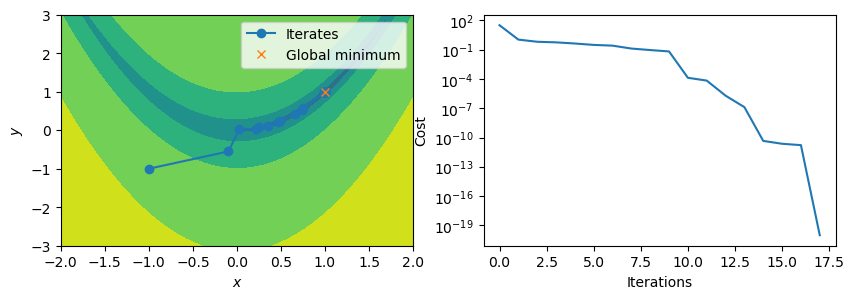

In [54]:
allvecs = np.array(sol_CG.allvecs)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].contourf(xx, yy, Rossenbrock_array,locator=ticker.LogLocator())
ax[0].plot(allvecs[:,0], allvecs[:,1],'-o', label=r'Iterates')
ax[0].plot(1, 1,'x', label=r'Global minimum')
ax[0].legend()
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[1].semilogy(fun_CG)
ax[1].set_xlabel(r'Iterations')
ax[1].set_ylabel(r'Cost')

In [19]:
fun_BFGS = []
callback = lambda intermediate_result: fun_BFGS.append(intermediate_result['fun'])
sol_BFGS = scipy.optimize.minimize(Rossenbrock, jac=Rossenbrock_grad, x0=(-1, -1), callback=callback, method='BFGS', options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 40
         Gradient evaluations: 40


Text(0, 0.5, 'Cost')

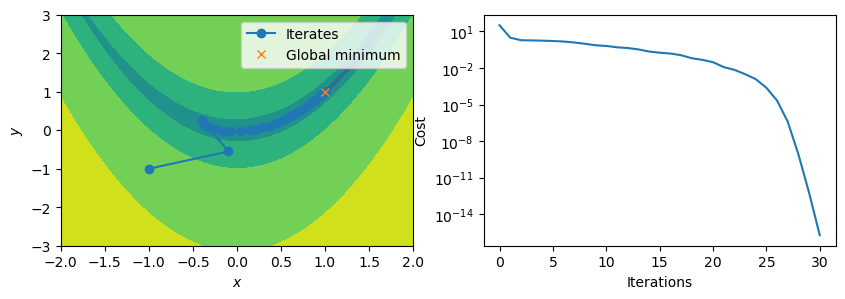

In [55]:
allvecs = np.array(sol_BFGS.allvecs)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].contourf(xx, yy, Rossenbrock_array,locator=ticker.LogLocator())
ax[0].plot(allvecs[:,0], allvecs[:,1],'-o', label=r'Iterates')
ax[0].plot(1, 1,'x', label=r'Global minimum')
ax[0].legend()
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[1].semilogy(fun_BFGS)
ax[1].set_xlabel(r'Iterations')
ax[1].set_ylabel(r'Cost')

In [17]:
fun_LBFGS = []
allvecs = [[-1, -1]]
def callback(intermediate_result): 
    fun_LBFGS.append(intermediate_result['fun'])
    allvecs.append(intermediate_result['x'].copy())
sol_LBFGS = scipy.optimize.minimize(Rossenbrock, jac=Rossenbrock_grad, x0=(-1, -1), callback=callback, method='L-BFGS-B', options={'disp': True})

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04000D+02    |proj g|=  8.04000D+02

At iterate    1    f=  3.32025D+01    |proj g|=  1.13106D+02

At iterate    2    f=  1.78265D+01    |proj g|=  8.17094D+01

At iterate    3    f=  1.06096D+00    |proj g|=  4.04243D+00

At iterate    4    f=  1.00704D+00    |proj g|=  2.00635D+00

At iterate    5    f=  9.95956D-01    |proj g|=  1.99804D+00

At iterate    6    f=  5.87500D-01    |proj g|=  1.25735D+00

At iterate    7    f=  5.54516D-01    |proj g|=  5.95652D+00

At iterate    8    f=  5.11397D-01    |proj g|=  2.92988D+00

At iterate    9    f=  4.58720D-01    |proj g|=  1.38973D+00

At iterate   10    f=  3.11308D-01    |proj g|=  3.41925D+00

At iterate   11    f=  2.55024D-01    |proj g|=  4.24360D+00

At iterate   12    f=  1.45090D-01    |proj g|=  9.63599D-01

At iterate   13    f=  1.1

 This problem is unconstrained.



At iterate   25    f=  4.97376D-11    |proj g|=  2.81172D-04

At iterate   26    f=  6.52150D-15    |proj g|=  1.91170D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     26     33      1     0     0   1.912D-06   6.522D-15
  F =   6.5215007756334701E-015

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Text(0, 0.5, 'Cost')

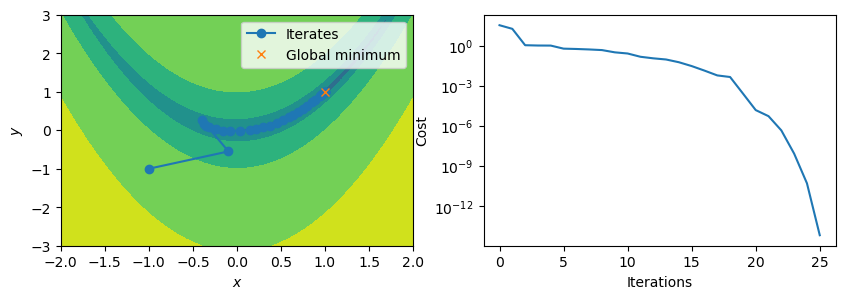

In [56]:
allvecs = np.array(allvecs)
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].contourf(xx, yy, Rossenbrock_array,locator=ticker.LogLocator())
ax[0].plot(allvecs[:,0], allvecs[:,1],'-o', label=r'Iterates')
ax[0].plot(1, 1,'x', label=r'Global minimum')
ax[0].legend()
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[1].semilogy(fun_LBFGS)
ax[1].set_xlabel(r'Iterations')
ax[1].set_ylabel(r'Cost')

## Comparison

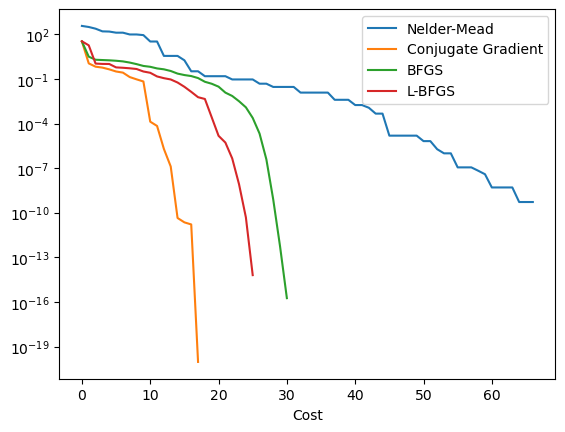

In [57]:
plt.semilogy(fun_NM, label=r'Nelder-Mead')
plt.semilogy(fun_CG, label=r'Conjugate Gradient')
plt.semilogy(fun_BFGS, label=r'BFGS')
plt.semilogy(fun_LBFGS, label=r'L-BFGS')
plt.xlabel(r'Iterations')
plt.xlabel(r'Cost')
plt.legend()

In [58]:
print('{0:20s} {1:4s} {2:4s}'.format('Algorithm', 'nfev', 'njev'))
labels = ['Nelder-Mead', 'Conjugate Gradient', 'BFGS', 'L-BFGS']
for (i, data) in enumerate(zip([sol_NM, sol_CG, sol_BFGS, sol_LBFGS], labels)):
    opt_sol = data[0]
    label   = data[1]
    if i>0:
        print('{0:20s} {1:4d} {2:4d}'.format(label,opt_sol.nfev, opt_sol.njev))
    else:
        print('{0:20s} {1:4d} {2:4f}'.format(label,opt_sol.nfev, np.nan))

Algorithm            nfev njev
Nelder-Mead           125  nan
Conjugate Gradient     39   39
BFGS                   40   40
L-BFGS                 33   33


## Multidimensional

In [123]:
from scipy.optimize import rosen, rosen_der

In [124]:
N = 4

In [125]:
initial_vec = -np.ones(N)
# Nelder-Mead
fun_NM_N = []
callback = lambda intermediate_result: fun_NM_N.append(intermediate_result['fun'])
sol_NM_N = scipy.optimize.minimize(rosen, x0=initial_vec, method='Nelder-Mead', callback=callback, options={'disp': True, 'return_all': True})
# Conjugate gradient
fun_CG_N = []
callback = lambda intermediate_result: fun_CG_N.append(intermediate_result['fun'])
sol_CG_N = scipy.optimize.minimize(rosen, jac=rosen_der, x0=initial_vec, method='CG', callback=callback, options={'disp': True, 'return_all': True})
# BFGS
fun_BFGS_N = []
callback = lambda intermediate_result: fun_BFGS_N.append(intermediate_result['fun'])
sol_BFGS_N = scipy.optimize.minimize(rosen, jac=rosen_der, x0=initial_vec, callback=callback, method='BFGS', options={'disp': True, 'return_all': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 268
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 114
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 57
         Gradient evaluations: 57


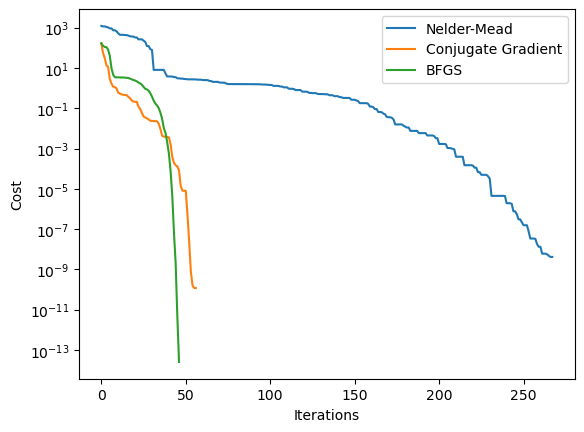

In [126]:
plt.semilogy(fun_NM_N, label=r'Nelder-Mead')
plt.semilogy(fun_CG_N, label=r'Conjugate Gradient')
plt.semilogy(fun_BFGS_N, label=r'BFGS')
plt.xlabel(r'Iterations')
plt.ylabel(r'Cost')
plt.legend()

##  What if I don't know the gradient?

In [164]:
nfev_jac = []
nfev_fd = []
dim = np.arange(2,6)
for N in dim:
    initial_vec = -np.ones(N)
    res_jac  = scipy.optimize.minimize(rosen, jac=rosen_der, x0=initial_vec, method='CG', options={'disp': True})
    res_fd = scipy.optimize.minimize(rosen, x0=initial_vec, method='CG', options={'disp': True})
    nfev_fd.append(res_fd.nfev)
    nfev_jac.append(res_jac.nfev)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 210
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 48
         Function evaluations: 101
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 81
         Function evaluations: 620
         Gradient evaluations: 155
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 57
         Function evaluations: 114
         Gradient evaluations: 114
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 84
         Function evaluations: 795
         Gradient evaluations: 1

/Users/calumskene/opt/miniconda3/envs/dedalus3/lib/python3.12/site-packages/scipy/optimize/_minimize.py:724: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 105
         Function evaluations: 1188
         Gradient evaluations: 198


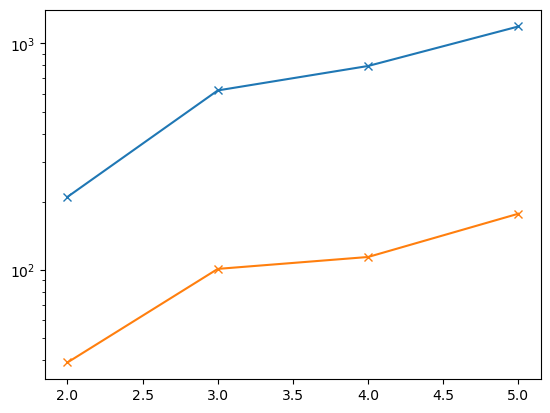

In [165]:
plt.semilogy(dim, nfev_fd, 'x-')
plt.semilogy(dim, nfev_jac, 'x-')